In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
path=r'C:\Users\rjbbl\OneDrive\Desktop\achievement 6\Sepsis Analysis Feb 24 2023'

In [3]:
df_clean = pd.read_csv(os.path.join(path,'02 Data Folder','data_clean.csv'), index_col = False)

In [4]:
df_census_clean = pd.read_csv(os.path.join(path,'02 Data Folder','census_clean.csv'), index_col = False)

In [5]:
df_census_clean. head()

,YEAR,STATE,RATE,DEATHS,STATE_NAME
0,2020,AL,16.4,1035,Alabama
1,2020,AK,9.7,65,Alaska
2,2020,AZ,4.5,426,Arizona
3,2020,AR,12.7,491,Arkansas
4,2020,CA,3.8,1731,California


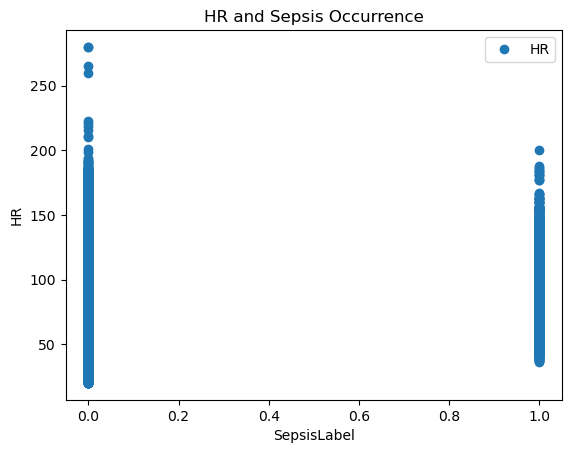

In [6]:
df_clean.plot(x ='SepsisLabel', y='HR',style='o'),
plt.title('HR and Sepsis Occurrence'),
plt.xlabel('SepsisLabel'),
plt.ylabel('HR'),
plt.show()
   

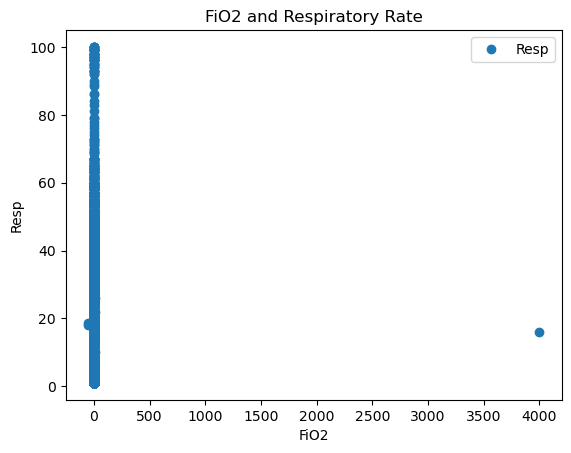

In [7]:
df_clean.plot(x ='FiO2', y='Resp',style='o'),
plt.title('FiO2 and Respiratory Rate'),
plt.xlabel('FiO2'),
plt.ylabel('Resp'),
plt.show()
### take the 4000 out

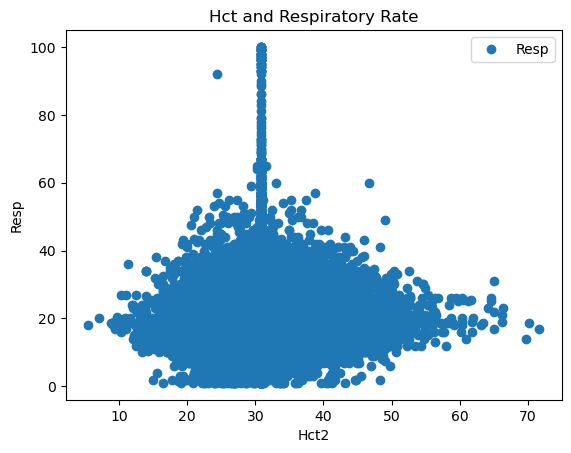

In [8]:
df_clean.plot(x ='Hct', y='Resp',style='o'),
plt.title('Hct and Respiratory Rate'),
plt.xlabel('Hct2'),
plt.ylabel('Resp'),
plt.show()

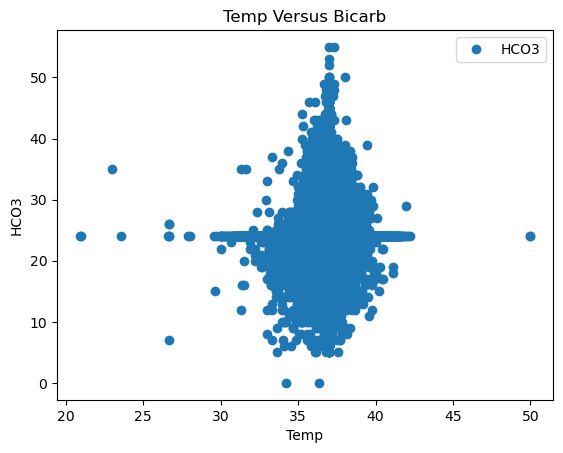

In [29]:
df_clean.plot(x ='Temp', y='HCO3',style='o'),
plt.title('Temp Versus Bicarb'),
plt.xlabel('Temp'),
plt.ylabel('HCO3'),
plt.show()

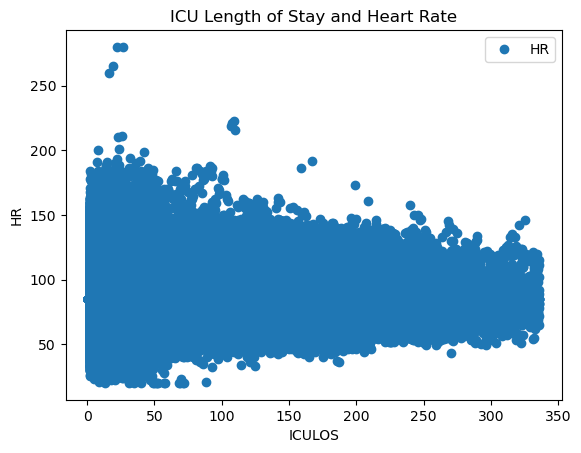

In [9]:
df_clean.plot(x ='ICULOS', y='HR',style='o'),
plt.title('ICU Length of Stay and Heart Rate'),
plt.xlabel('ICULOS'),
plt.ylabel('HR'),
plt.show()

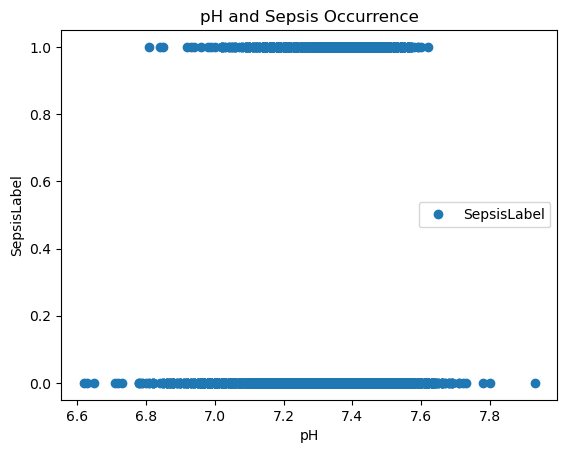

In [10]:
df_clean.plot(x ='pH', y='SepsisLabel',style='o'),
plt.title('pH and Sepsis Occurrence'),
plt.xlabel('pH'),
plt.ylabel('SepsisLabel'),
plt.show()

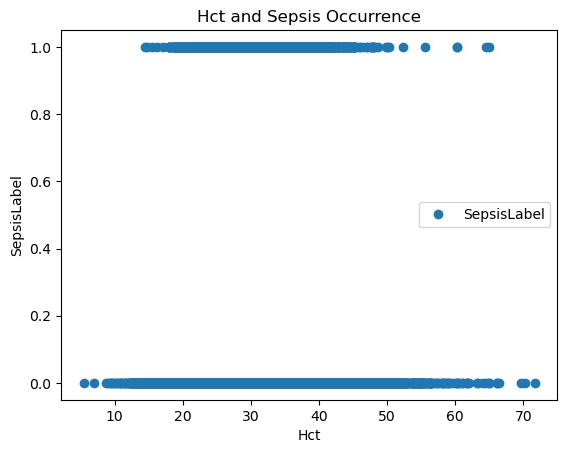

In [11]:
df_clean.plot(x ='Hct', y='SepsisLabel',style='o'),
plt.title('Hct and Sepsis Occurrence'),
plt.xlabel('Hct'),
plt.ylabel('SepsisLabel'),
plt.show()

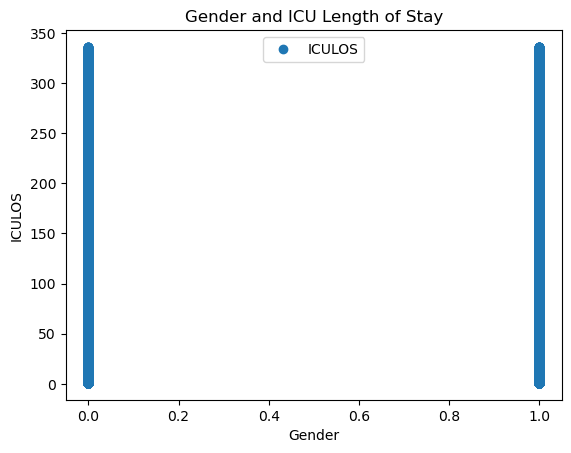

In [12]:
df_clean.plot(x ='Gender', y='ICULOS',style='o'),
plt.title('Gender and ICU Length of Stay'),
plt.xlabel('Gender'),
plt.ylabel('ICULOS'),
plt.show()

In [13]:
 X = df_clean['ICULOS'].values.reshape(-1,1)
y = df_clean['HR'].values.reshape(-1,1)

In [14]:
# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#Create a regression object
regression = LinearRegression()

In [16]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:

y_predicted = regression.predict(X_test)

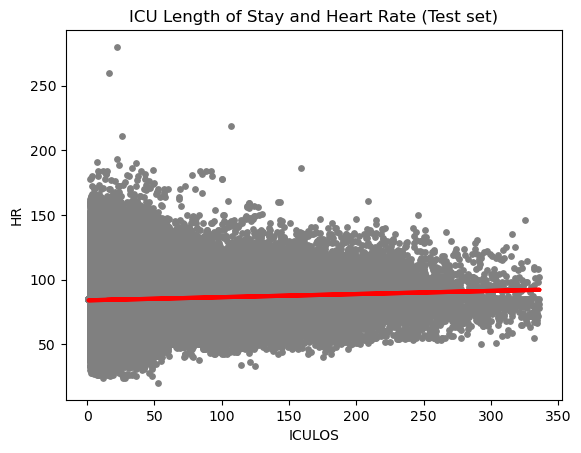

In [21]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ICU Length of Stay and Heart Rate (Test set)')
plot_test.xlabel('ICULOS')
plot_test.ylabel('HR')
plot_test.show()

In [22]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02425121]]
Mean squared error:  269.69544004493093
R2 score:  0.0019830438294213826


In [24]:
y_predicted

array([[84.50085926],
       [83.99158382],
       [84.20984472],
       ...,
       [84.45235684],
       [84.20984472],
       [84.30684957]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,113.00,84.500859
1,71.00,83.991584
2,72.00,84.209845
3,86.00,84.112840
4,84.58,83.943081
5,84.58,83.943081
6,99.00,84.161342
7,76.00,84.840376
8,84.50,84.306850
9,86.00,84.379603


Determining if the Regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02425121]]
Mean squared error:  269.69544004493093
R2 score:  0.0019830438294213826


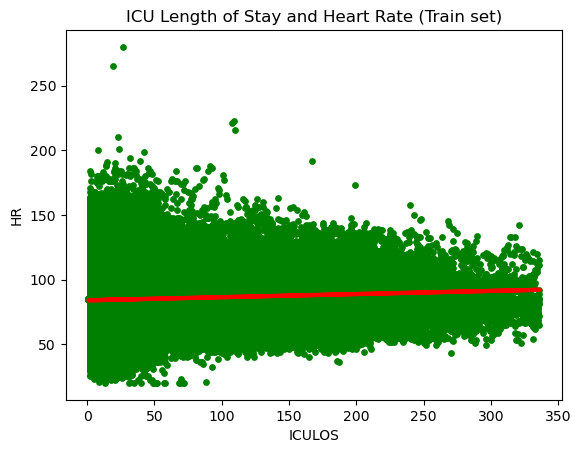

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('ICU Length of Stay and Heart Rate (Train set)')
plot_test.xlabel('ICULOS')
plot_test.ylabel('HR')
plot_test.show()

In [30]:
 X = df_clean['Temp'].values.reshape(-1,1)
y = df_clean['HCO3'].values.reshape(-1,1)

In [31]:
# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
#Create a regression object
regression = LinearRegression()

In [33]:
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predicted = regression.predict(X_test)

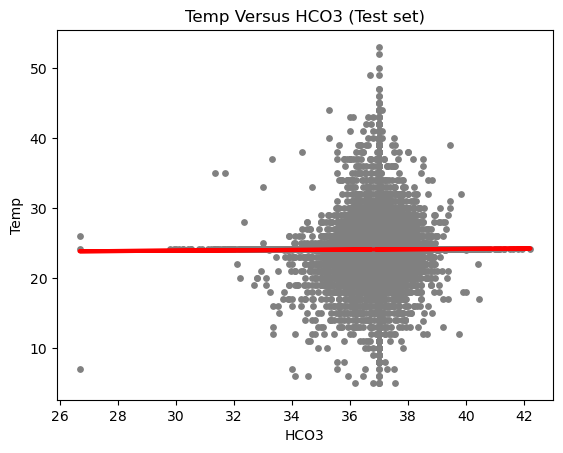

In [40]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Temp Versus HCO3 (Test set)')
plot_test.xlabel('HCO3')
plot_test.ylabel('Temp')
plot_test.show()

In [36]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0253009]]
Mean squared error:  0.8031022900132687
R2 score:  0.0001681288750990939


In [42]:
y_predicted

array([[24.06822879],
       [24.06924082],
       [24.04596399],
       ...,
       [24.06924082],
       [24.06924082],
       [24.06139754]])

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24.07,24.068229
1,24.07,24.069241
2,24.07,24.045964
3,24.07,24.069241
4,24.07,24.069241
5,24.07,24.069241
6,24.07,24.092518
7,24.07,24.069241
8,24.07,24.069241
9,24.07,24.095048


In [44]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0253009]]
Mean squared error:  0.8031022900132687
R2 score:  0.0001681288750990939


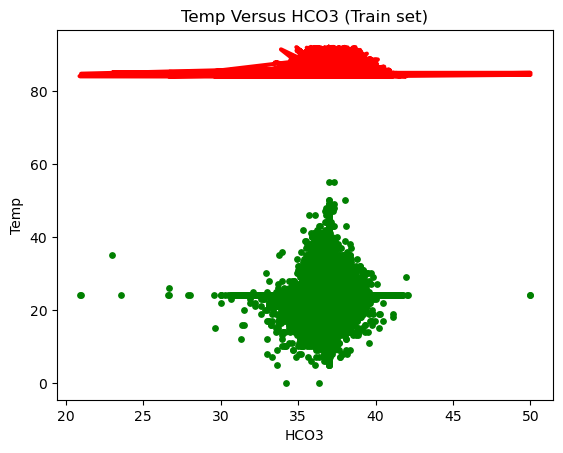

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Temp Versus HCO3 (Train set)')
plot_test.xlabel('HCO3')
plot_test.ylabel('Temp')
plot_test.show()

Overall I wish I could have a three way analysis rather than a two dimensional. Regardless when the lab values start trending toward out of normal range it looks like the temperature also trends upwards upward but according to the R values there is relatively no linear relationship between the values. This is the same for length of stay and heart rate and everything I plotted was in the 0.000_____ range so very low R2 scores on everything I tried. 








# Hypothesis:
Using abnormal clinical findings can diagnosis sepsis as well as using laboratory values.

(This would mean you take less blood overall because you would use nonivasiva monitoring data to trend patient rather than bloodwork.) 